In [1]:
import numpy as np
import scipy
from scipy.fft import fft, fftshift
from scipy.signal import correlate
import glob
import os
import zipfile
import matplotlib
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FuncFormatter


# defines the frequency axis
sampling_rate = 2.2  # sample rate in MHz
num_samples = 2048  # number of samples
freqs = np.fft.fftshift(np.fft.fftfreq(num_samples, 1/sampling_rate))
freqs = freqs + 145.2 # frequency (with adjustment to account for center frequency)
time = np.arange(0, 10, 1/sampling_rate) # time vector


In [2]:
def check_and_load_files(directory):
    valid_files = []
    bad_files = []
    
    # lists all .npz files in the directory
    files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.npz')]
    for file in files:
        try:
            # attempts to load the file to check if it's corrupted
            with np.load(file) as data:
                valid_files.append(file)
                #print(data.shape)
        except zipfile.BadZipFile:
            print(f'Bad file: {file}')
            bad_files.append(file)
        except Exception as e:
            print(f'Error in file {file}: {e}')
            bad_files.append(file)
    
    # removes bad files
    for bad_file in bad_files:
        try:
            print()
        except OSError as e:
            print(f'Error removing file {bad_file}: {e}')
    
    return valid_files

def concatenate_valid_files(valid_files):
    all_data = []
    for file in valid_files:
        try:
            # loads and append data from each valid file
            data = np.load(file)['data']
            all_data.append(data)
        except Exception as e:
            print(f'Failed to load data from {file}: {e}')
    
    # concatenates all successfully loaded data
    if all_data:
        return np.concatenate(all_data, axis=0).view('int8')
    else:
        return None


In [3]:
# Initialize three separate lists
ip_data1, ip_data2, ip_data3, ip_data4 = [], [], [], []

# List of IP addresses
ip_addresses = ["10.10.10.20", "10.10.10.30", "10.10.10.40", "10.10.10.50"]

# List of lists to map each IP address to its corresponding list
ip_data_lists = [ip_data1, ip_data2, ip_data3, ip_data4]

for idx, ip in enumerate(ip_addresses):
    # Directory containing the .npz files for the current IP address
    directory = f'output_{ip}'
    
    # Get valid files from the directory
    valid_files = check_and_load_files(directory)
    
    # Append the list of valid files to the corresponding list
    ip_data_lists[idx].extend(valid_files)

# Print the results to verify
#print("ip_data_1:", ip_data_1)
#print("ip_data_2:", ip_data_2)
#print("ip_data_3:", ip_data_3)
print(ip_data_lists[0])
print(ip_data_lists[1])
print(ip_data_lists[2])
print(ip_data_lists[3])

# concatenates valid files
if ip_data1:
    data1 = concatenate_valid_files(np.array(ip_data1))
    data2 = concatenate_valid_files(np.array(ip_data2))
    data3 = concatenate_valid_files(np.array(ip_data3))
    data4 = concatenate_valid_files(np.array(ip_data4))
    if data1 is not None:
        #data_shape = data.shape
        print()
        #print(f'Number of files:  {num_files}')
        print(f'Data shape [{ip_addresses[0]}]:       {data1.shape}')
        print(f'Data shape [{ip_addresses[1]}]:       {data2.shape}')
        print(f'Data shape [{ip_addresses[2]}]:       {data3.shape}')
        print(f'Data shape [{ip_addresses[3]}]:       {data4.shape}')
        print()
else:
    print()
    print('Missing valid files.')
    print()


['output_10.10.10.20/data_00086.npz', 'output_10.10.10.20/data_00003.npz', 'output_10.10.10.20/data_00419.npz', 'output_10.10.10.20/data_00075.npz', 'output_10.10.10.20/data_00467.npz', 'output_10.10.10.20/data_00124.npz', 'output_10.10.10.20/data_00356.npz', 'output_10.10.10.20/data_00220.npz', 'output_10.10.10.20/data_00197.npz', 'output_10.10.10.20/data_00507.npz', 'output_10.10.10.20/data_00349.npz', 'output_10.10.10.20/data_00211.npz', 'output_10.10.10.20/data_00209.npz', 'output_10.10.10.20/data_00087.npz', 'output_10.10.10.20/data_00329.npz', 'output_10.10.10.20/data_00314.npz', 'output_10.10.10.20/data_00433.npz', 'output_10.10.10.20/data_00268.npz', 'output_10.10.10.20/data_00225.npz', 'output_10.10.10.20/data_00133.npz', 'output_10.10.10.20/data_00272.npz', 'output_10.10.10.20/data_00158.npz', 'output_10.10.10.20/data_00338.npz', 'output_10.10.10.20/data_00325.npz', 'output_10.10.10.20/data_00100.npz', 'output_10.10.10.20/data_00207.npz', 'output_10.10.10.20/data_00415.npz', 

In [4]:
# converts to complex data
data_comp1 = data1[...,0] + 1j * data1[...,1]
data_comp2 = data2[...,0] + 1j * data2[...,1]
data_comp3 = data3[...,0] + 1j * data3[...,1]
data_comp4 = data4[...,0] + 1j * data4[...,1]


# computes power spectra for plotting
def perform_power(signal):
    return np.abs(signal)**2

# fft shifts the signal data
def shift(signal):
    return fftshift(signal)


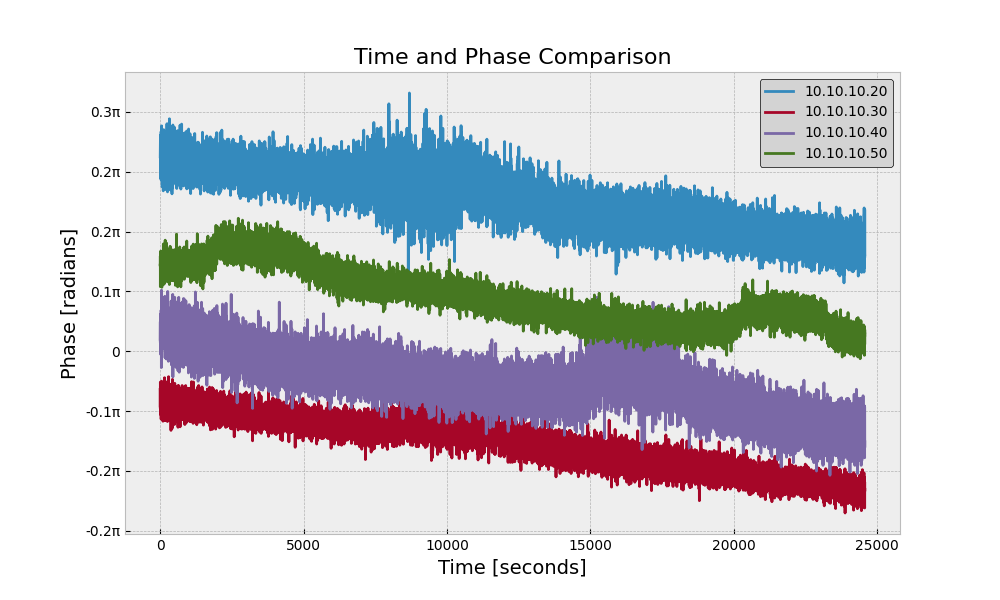

In [5]:
# creates the function to format the y-axis in terms of multiples of pi
def radian_formatter(x, pos):
    return f'{x/np.pi:.1f}π' if x != 0 else '0'

# parameters
offset = 0
time_num = 12 * num_samples

t = np.arange(time_num) * 1/2.2e6
phazor = np.exp(2*np.pi*1j * 0.2e6 * t)

# creates a list of datasets and labels for IP addresses
data_comps = [data_comp1, data_comp2, data_comp3, data_comp4]
labels = ip_addresses

plt.style.use('bmh')
plt.figure(figsize=(10,6))
plt.title('Time and Phase Comparison', fontsize=16)

# plots each dataset with the corresponding IP label
for data_comp, label in zip(data_comps, labels):
    plt.plot(np.unwrap(np.angle(data_comp.ravel()[offset:offset+time_num] * phazor)) / np.pi, label=label)

plt.xlabel('Time [seconds]', fontsize=14)
plt.ylabel('Phase [radians]', fontsize=14)
#plt.ylim(-np.pi, np.pi)

# formats the y-axis ticks as multiples of π
plt.gca().yaxis.set_major_formatter(FuncFormatter(radian_formatter))

plt.legend(loc='best', framealpha=1, frameon=True, facecolor='lightgray', edgecolor='k')

plt.show()


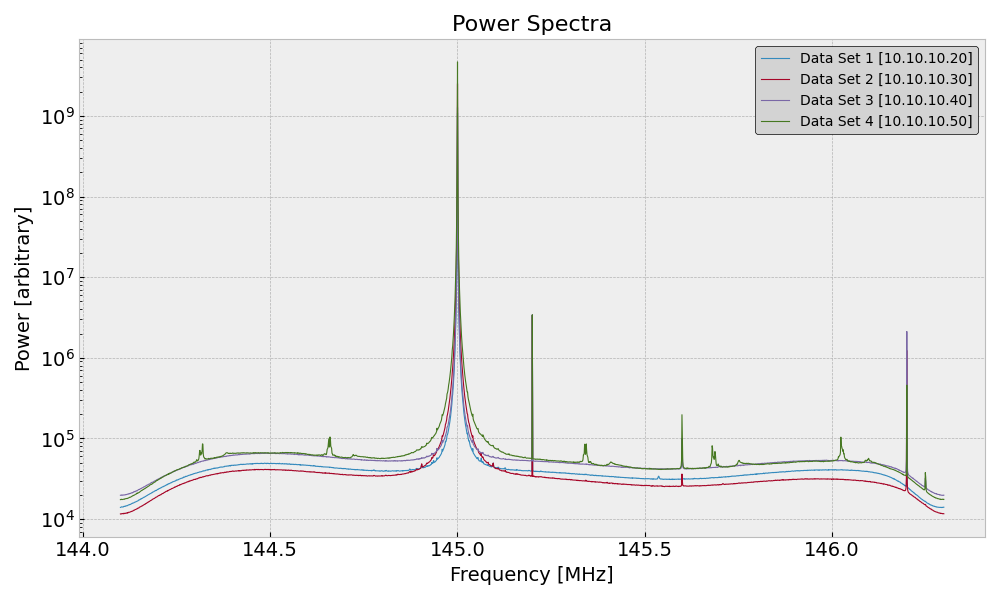

In [6]:
plt.figure(figsize=(10, 6))

# plots the power spectra
pwr_mean1 = shift(np.mean(perform_power(fft(data_comp1)), axis=0))
pwr_mean2 = shift(np.mean(perform_power(fft(data_comp2)), axis=0))
pwr_mean3 = shift(np.mean(perform_power(fft(data_comp3)), axis=0))
pwr_mean4 = shift(np.mean(perform_power(fft(data_comp4)), axis=0))


plt.semilogy(freqs, pwr_mean1, linewidth=0.8, label='Data Set 1 [10.10.10.20]')
plt.semilogy(freqs, pwr_mean2, linewidth=0.8, label='Data Set 2 [10.10.10.30]')
plt.semilogy(freqs, pwr_mean3, linewidth=0.8, label='Data Set 3 [10.10.10.40]')
plt.semilogy(freqs, pwr_mean4, linewidth=0.8, label='Data Set 4 [10.10.10.50]')


plt.title('Power Spectra', fontsize=16)
plt.xlabel('Frequency [MHz]', fontsize=14)
plt.ylabel('Power [arbitrary]', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# limits decimal places on x-axis to one
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.tight_layout()

# adds a snazzy custom legend
plt.legend(loc='best', framealpha=1, frameon=True, facecolor='lightgray', edgecolor='k')

# shows the plot
plt.show()

In [7]:
# # function that computes amplitude of given signal
# def compute_amplitude(signal):
#     return np.abs(signal)

# # function that shifts the signal over
# def shift(signal):
#     return fftshift(signal)

# # creates a time array based on the length of the concatenated data
# time_length = min(data1.shape[0], data2.shape[0], data3.shape[0]) / sampling_rate
# time = np.arange(0, time_length, 1/sampling_rate)

# # function that plots phase lag with matching dimensions
# def plot_phase_lag(time, signals, labels):
#     plt.figure(figsize=(10, 6))

#     for signal, label in zip(signals, labels):
#         amplitude = compute_amplitude(signal)
#         # Trim the amplitude to match the time array length
#         amplitude = amplitude[:len(time), 0]  

#         plt.plot(time, amplitude, label=label)

#     plt.xlabel('Time (µs)', fontsize=14)
#     plt.ylabel('Amplitude [arbitrary]', fontsize=14)
#     plt.legend(loc='best', framealpha=1, frameon=True, facecolor='lightgray', edgecolor='k')
#     plt.title('Phase Lag - Time vs Amplitude', fontsize=16)
#     plt.show()

# # checks the dimensions and plots
# if data1.shape[0] >= len(time) and data2.shape[0] >= len(time) and data3.shape[0] >= len(time):
#     signals = [data_comp1, data_comp2, data_comp3, data_comp4]
#     labels = [f"{ip}" for ip in ip_addresses]
#     print(f'Data shapes: {[data1.shape[0], data2.shape[0], data3.shape[0], data4.shape[0]]}')
#     plot_phase_lag(time, signals, labels)
# else:
#     print('Data and time dimensions do not match!')
    
    


## Leave all hope, ye who go beyond here!
### (Very rough testing of random stuff)

In [8]:
# # creates a figure with 3 subplots
# plt.figure(figsize=(12, 8))

# # subplot for data_comp1
# plt.subplot(3, 1, 1)
# plt.plot(np.angle(data_comp1[:-1, -1] * data_comp1[1:, 0].conj()), label='Real')
# plt.plot(np.angle(data_comp1[:, -2] * data_comp1[:, -1].conj()), label='Imaginary')
# plt.xlabel('Frequency [MHz]', fontsize=16)
# plt.ylabel('Phase [radians]', fontsize=16)
# plt.title('Data Set 1 [10.10.10.40]', fontsize=18)
# plt.yticks(np.linspace(-np.pi, np.pi, 5), [r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
# plt.gca().ticklabel_format(axis='x', style='plain')

# # subplot for data_comp2
# plt.subplot(3, 1, 2)
# plt.plot(np.angle(data_comp2[:-1, -1] * data_comp2[1:, 0].conj()), label='Real')
# plt.plot(np.angle(data_comp2[:, -2] * data_comp2[:, -1].conj()), label='Imaginary')
# plt.xlabel('Frequency [MHz]', fontsize=16)
# plt.ylabel('Phase [radians]', fontsize=16)
# plt.title('Data Set 2 [10.10.10.50]', fontsize=18)
# plt.yticks(np.linspace(-np.pi, np.pi, 5), [r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
# plt.gca().ticklabel_format(axis='x', style='plain')

# # subplot for data_comp3
# plt.subplot(3, 1, 3)
# plt.plot(np.angle(data_comp3[:-1, -1] * data_comp3[1:, 0].conj()), label='Real')
# plt.plot(np.angle(data_comp3[:, -2] * data_comp3[:, -1].conj()), label='Imaginary')
# plt.xlabel('Frequency [MHz]', fontsize=16)
# plt.ylabel('Phase [radians]', fontsize=16)
# plt.title('Data Set 3 [10.10.10.60]', fontsize=18)
# plt.yticks(np.linspace(-np.pi, np.pi, 5), [r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
# plt.gca().ticklabel_format(axis='x', style='plain')

# # subplot for data_comp4
# plt.subplot(3, 1, 4)
# plt.plot(np.angle(data_comp4[:-1, -1] * data_comp4[1:, 0].conj()), label='Real')
# plt.plot(np.angle(data_comp4[:, -2] * data_comp4[:, -1].conj()), label='Imaginary')
# plt.xlabel('Frequency [MHz]', fontsize=16)
# plt.ylabel('Phase [radians]', fontsize=16)
# plt.title('Data Set 3 [10.10.10.70]', fontsize=18)
# plt.yticks(np.linspace(-np.pi, np.pi, 5), [r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
# plt.gca().ticklabel_format(axis='x', style='plain')

# plt.tight_layout()

# plt.show()


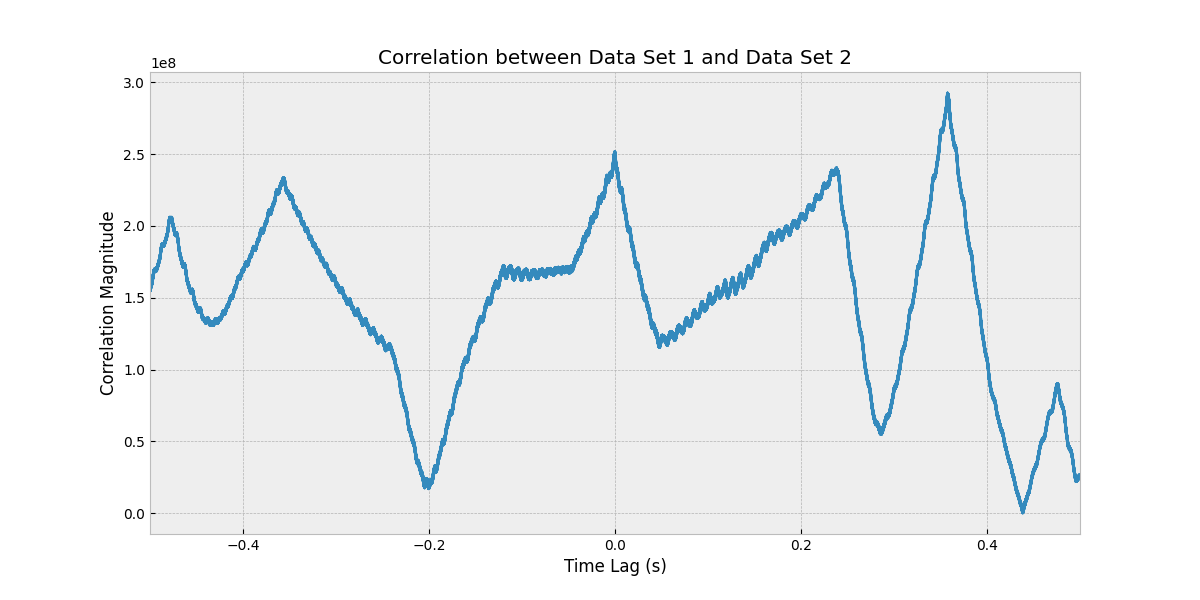

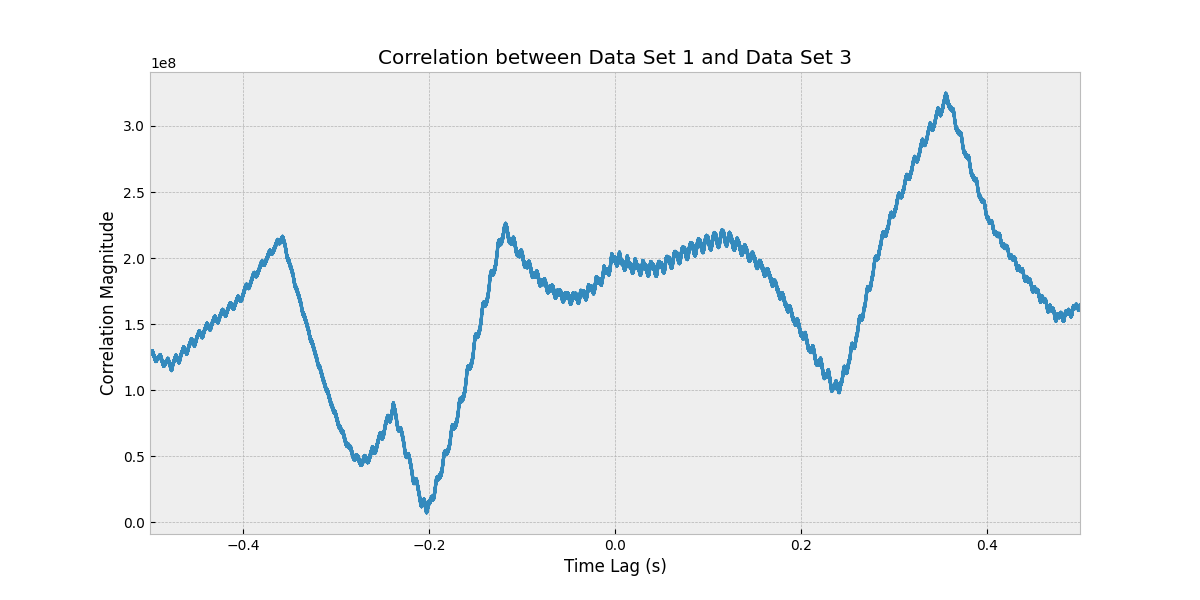

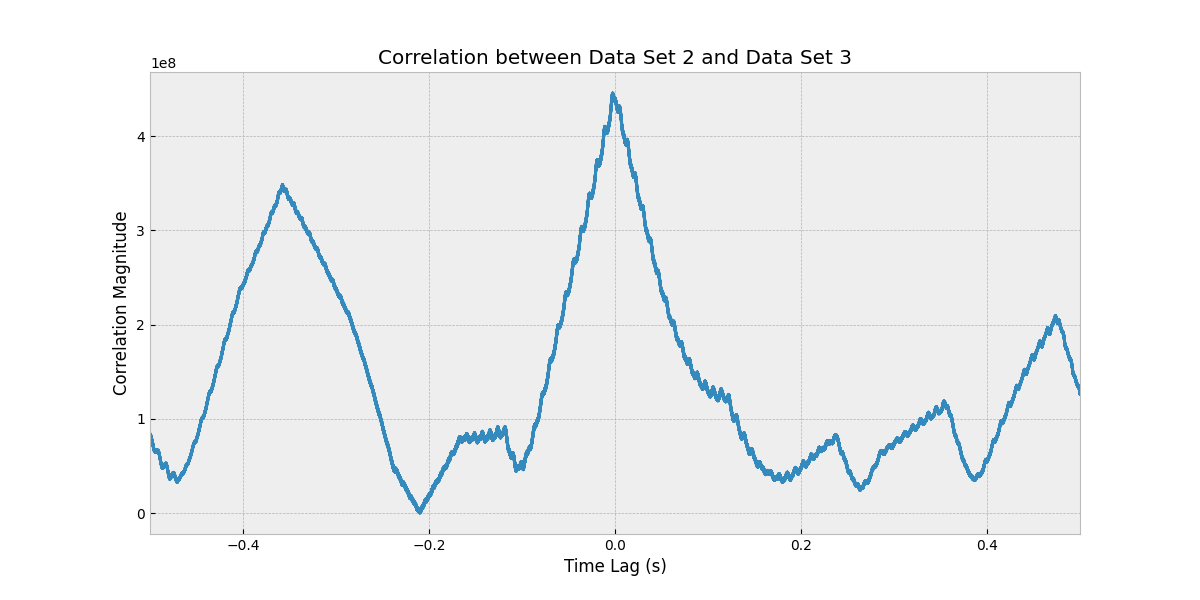

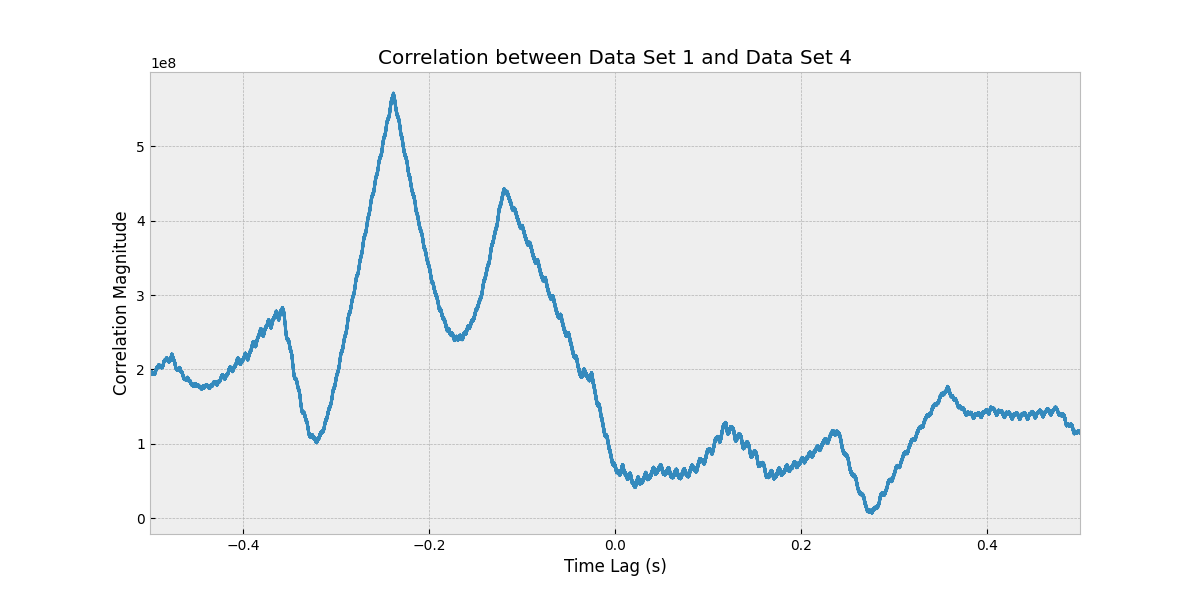

In [9]:
def plot_correlation(data1, data2, sampling_rate, num_samples, max_lag_seconds=1, title='Correlation Plot'):
    # ensures the data is complex
    if data1.dtype != complex:
        data1 = data1[...,0] + 1j * data1[...,1]
    if data2.dtype != complex:
        data2 = data2[...,0] + 1j * data2[...,1]
    
    # flattens the arrays
    data1 = data1.ravel()
    data2 = data2.ravel()
    
    # calculates the maximum lag in samples
    max_lag_samples = int(max_lag_seconds * sampling_rate)
    
    # computes the cross-correlation for a limited range of lags
    correlation = correlate(data1[:max_lag_samples], data2[:max_lag_samples], mode='same')
    
    # creates the time lag array
    lags = np.arange(-max_lag_samples//2, max_lag_samples//2)
    time_lags = lags / sampling_rate
    
    # plots the correlation
    plt.figure(figsize=(12, 6))
    plt.plot(time_lags, np.abs(correlation))
    plt.title(title)
    plt.xlabel('Time Lag (s)')
    plt.ylabel('Correlation Magnitude')
    plt.grid(True)
    
    # Set x-axis limits
    plt.xlim(-max_lag_seconds/2, max_lag_seconds/2)
    
    plt.show()

# performs the plotting
plot_correlation(data_comp1, data_comp2, sampling_rate=2.2e6, num_samples=2048, max_lag_seconds=1,
                 title='Correlation between Data Set 1 and Data Set 2')
plot_correlation(data_comp1, data_comp3, sampling_rate=2.2e6, num_samples=2048, max_lag_seconds=1,
                 title='Correlation between Data Set 1 and Data Set 3')
plot_correlation(data_comp2, data_comp3, sampling_rate=2.2e6, num_samples=2048, max_lag_seconds=1,
                 title='Correlation between Data Set 2 and Data Set 3')
plot_correlation(data_comp1, data_comp4, sampling_rate=2.2e6, num_samples=2048, max_lag_seconds=1,
                 title='Correlation between Data Set 1 and Data Set 4')

In [10]:
# def plot_correlations_imshow(data_list, sampling_rate, max_lag_seconds=1, num_segments=100):
#     n = len(data_list)
#     fig, axes = plt.subplots(n-1, n-1, figsize=(15, 15))
#     fig.suptitle('Correlation "Imshow" Plots', fontsize=16)

#     # calculates the maximum lag in samples
#     max_lag_samples = int(max_lag_seconds * sampling_rate)

#     for i in range(n-1):
#         for j in range(i+1, n):
#             data1 = data_list[i].ravel()
#             data2 = data_list[j].ravel()

#             # ensures both arrays have the same length
#             min_length = min(len(data1), len(data2))
#             data1 = data1[:min_length]
#             data2 = data2[:min_length]

#             # splits the data into segments
#             segment_length = min_length // num_segments
#             data1_segments = data1[:segment_length * num_segments].reshape(num_segments, -1)
#             data2_segments = data2[:segment_length * num_segments].reshape(num_segments, -1)

#             # computes the cross-correlation for each segment
#             correlations = np.array([correlate(d1, d2, mode='same') for d1, d2 in zip(data1_segments, data2_segments)])

#             # creates the time lag array
#             lags = np.arange(-segment_length//2, segment_length//2)
#             time_lags = lags / sampling_rate

#             # creates imshow plots
#             ax = axes[i][j-1]
#             im = ax.imshow(np.abs(correlations), aspect='auto', 
#                            extent=[time_lags[0], time_lags[-1], 0, num_segments],
#                            interpolation='nearest', cmap='plasma')
#             ax.set_title(f'Correlation {i+1} vs {j+1}')
#             ax.set_xlabel('Time Lag (s)')
#             ax.set_ylabel('Segment Number')
#             ax.grid(False) # gets rid of nasty grid
#             #ax.set_xlim(-max_lag_seconds/2, max_lag_seconds/2)

#             # adds colorbar
#             plt.colorbar(im, ax=ax)
            

#     # removes unused subplots
#     for i in range(n-1):
#         for j in range(n-1):
#             if j < i:
#                 fig.delaxes(axes[i][j])

#     plt.tight_layout()
#     plt.show()

# # plotting
# data_list = [data_comp1, data_comp2, data_comp3, data_comp4]
# plot_correlations_imshow(data_list, sampling_rate, max_lag_seconds=1, num_segments=100)

In [11]:
# # Function to normalize the complex signals using magnitude
# def norm(signal):
#     magnitude = np.abs(signal)
#     return (magnitude - np.mean(magnitude)) / np.std(magnitude)

# # Function to compute and plot cross-correlation between pairs of signals using imshow
# def plot_correlations_imshow(data_list, sampling_rate, max_lag_seconds=1, num_segments=100):
#     n = len(data_list)
#     fig, axes = plt.subplots(n-1, n-1, figsize=(15, 15))
#     fig.suptitle('Correlation "Imshow" Plots', fontsize=16)

#     # Calculate the maximum lag in samples
#     max_lag_samples = int(max_lag_seconds * sampling_rate)

#     for i in range(n-1):
#         for j in range(i+1, n):
#             # Normalize both signals (using magnitude for complex signals)
#             data1 = norm(data_list[i].ravel())
#             data2 = norm(data_list[j].ravel())

#             # Ensure both arrays have the same length
#             min_length = min(len(data1), len(data2))
#             data1 = data1[:min_length]
#             data2 = data2[:min_length]

#             # Split the data into segments
#             segment_length = min_length // num_segments
#             data1_segments = data1[:segment_length * num_segments].reshape(num_segments, -1)
#             data2_segments = data2[:segment_length * num_segments].reshape(num_segments, -1)

#             # Compute the cross-correlation for each segment
#             correlations = np.array([correlate(d1, d2, mode='same') for d1, d2 in zip(data1_segments, data2_segments)])

#             # Create the time lag array
#             lags = np.arange(-segment_length // 2, segment_length // 2)
#             time_lags = lags / sampling_rate

#             # Create imshow plot
#             ax = axes[i][j-1]
#             im = ax.imshow(np.abs(correlations), aspect='auto', 
#                            extent=[time_lags[0], time_lags[-1], 0, num_segments],
#                            interpolation='nearest', cmap='plasma')
#             ax.set_title(f'Correlation {i+1} vs {j+1}')
#             ax.set_xlabel('Time Lag (s)')
#             ax.set_ylabel('Segment Number')
#             ax.grid(False)

#             # Add colorbar
#             plt.colorbar(im, ax=ax)

#     # Remove unused subplots
#     for i in range(n-1):
#         for j in range(n-1):
#             if j < i:
#                 fig.delaxes(axes[i][j])

#     plt.tight_layout()
#     plt.show()

# # Example usage
# data_list = [data_comp1, data_comp2, data_comp3, data_comp4]
# plot_correlations_imshow(data_list, sampling_rate=2.2e6, max_lag_seconds=1, num_segments=100)


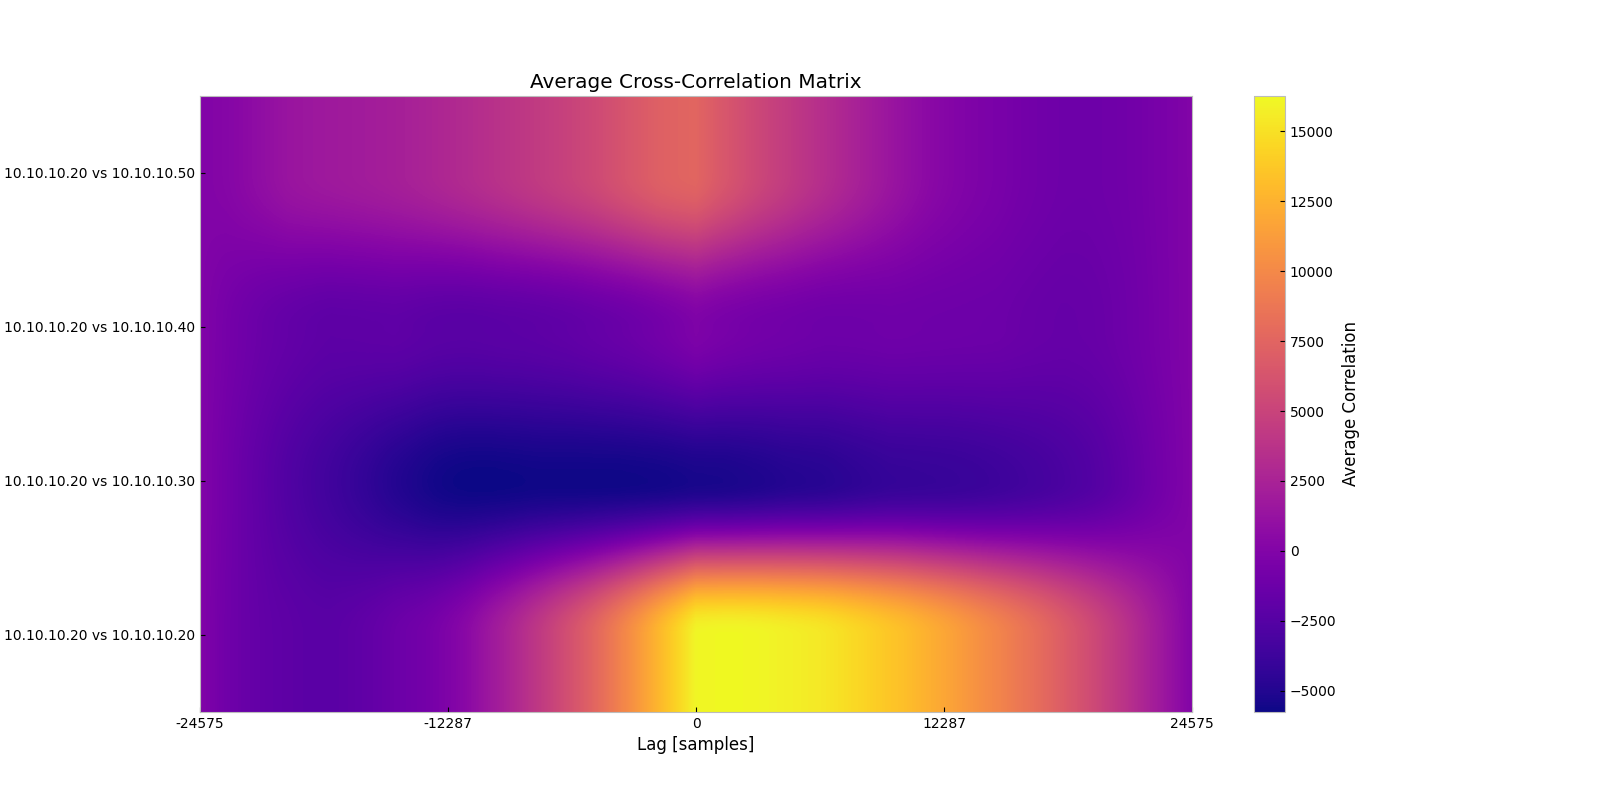

In [12]:
# Number of signals
num_signals = len(data_comps)

# Initialize the correlation matrix
correlation_matrix = np.zeros((num_signals, num_signals, 2 * time_num - 1))

# Compute the correlation matrix
for i in range(num_signals):
    for j in range(i, num_signals):
        signal1 = np.unwrap(np.angle(data_comps[i].ravel()[offset:offset+time_num] * phazor))
        signal2 = np.unwrap(np.angle(data_comps[j].ravel()[offset:offset+time_num] * phazor))
        
        # Compute cross-correlation
        corr = correlate(signal1, signal2, mode='full')
        correlation_matrix[i, j, :] = corr
        if i != j:
            correlation_matrix[j, i, :] = corr  # Symmetric matrix

# Average correlations across all pairs for simplicity
avg_correlation = np.mean(correlation_matrix, axis=0)

# Plot the average correlation matrix
plt.figure(figsize=(16, 8))
plt.imshow(avg_correlation, aspect='auto', cmap='plasma', origin='lower')
plt.colorbar(label='Average Correlation')
plt.xlabel('Lag [samples]')
plt.ylabel('Signal Pair')
plt.title('Average Cross-Correlation Matrix')

# Set tick labels for the x-axis
plt.xticks(ticks=np.linspace(0, 2*time_num-1, num=5), labels=np.linspace(-time_num+1, time_num-1, num=5).astype(int)) # chatGPT added this, not sure if correct

# Set tick labels for the y-axis
yticks = np.arange(num_signals)
yticklabels = [f'{labels[i]} vs {labels[j]}' for i in range(num_signals) for j in range(i, num_signals)] # chatGPT added this label thing, not sure if correct
plt.yticks(ticks=yticks, labels=yticklabels[:num_signals])  # Adjust labels to match y-ticks
plt.grid(False)

plt.show()


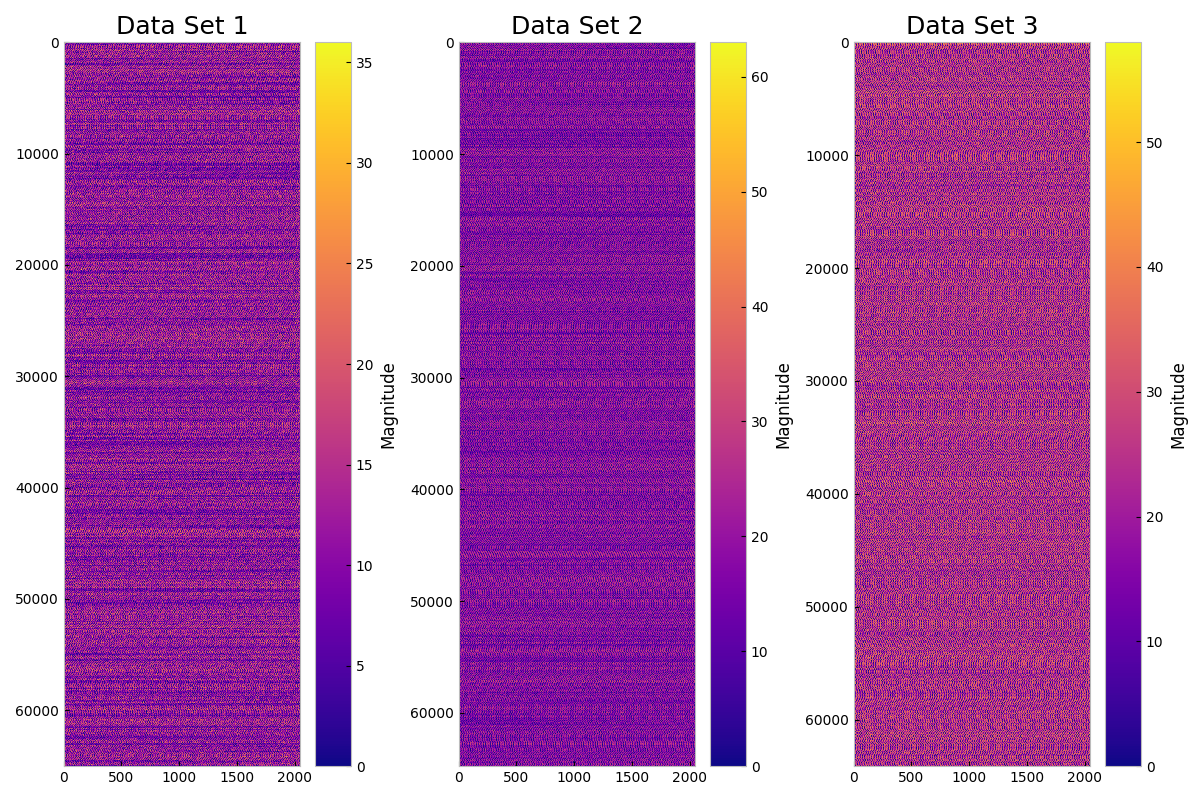

In [13]:
# creates a figure with 3 subplots for magnitude
plt.figure(figsize=(12, 8))

# subplot for data_comp1
plt.subplot(1, 3, 1)
plt.imshow(np.abs(data_comp1[:, :].real), cmap='plasma', interpolation='nearest', aspect='auto')
plt.colorbar(label='Magnitude')
plt.title('Data Set 1', fontsize=18)
plt.grid(False)

# subplot for data_comp2
plt.subplot(1, 3, 2)
plt.imshow(np.abs(data_comp2[:, :].real), cmap='plasma', interpolation='nearest', aspect='auto')
plt.colorbar(label='Magnitude')
plt.title('Data Set 2', fontsize=18)
plt.grid(False)

# subplot for data_comp4
plt.subplot(1, 3, 3)
plt.imshow(np.abs(data_comp4[:, :].real), cmap='plasma', interpolation='nearest', aspect='auto')
plt.colorbar(label='Magnitude')
plt.title('Data Set 3', fontsize=18)
plt.grid(False)

plt.tight_layout()
plt.show()

In [14]:
# '''This is the transpose of the data plotted (switching x- and y-axes)'''

# # creates a figure with 3 subplots for magnitude
# plt.figure(figsize=(12, 8))

# # subplot for data_comp1
# plt.subplot(1, 3, 1)
# plt.imshow(np.abs(data_comp1[:, :].real).T, cmap='plasma', interpolation='nearest', aspect='auto')
# plt.colorbar(label='Magnitude')
# plt.title('Data Set 1', fontsize=18)
# plt.grid(False)

# # subplot for data_comp2
# plt.subplot(1, 3, 2)
# plt.imshow(np.abs(data_comp2[:, :].real).T, cmap='plasma', interpolation='nearest', aspect='auto')
# plt.colorbar(label='Magnitude')
# plt.title('Data Set 2', fontsize=18)
# plt.grid(False)

# # subplot for data_comp4
# plt.subplot(1, 3, 3)
# plt.imshow(np.abs(data_comp4[:, :].real).T, cmap='plasma', interpolation='nearest', aspect='auto')
# plt.colorbar(label='Magnitude')
# plt.title('Data Set 3', fontsize=18)
# plt.grid(False)

# plt.tight_layout()
# plt.show()

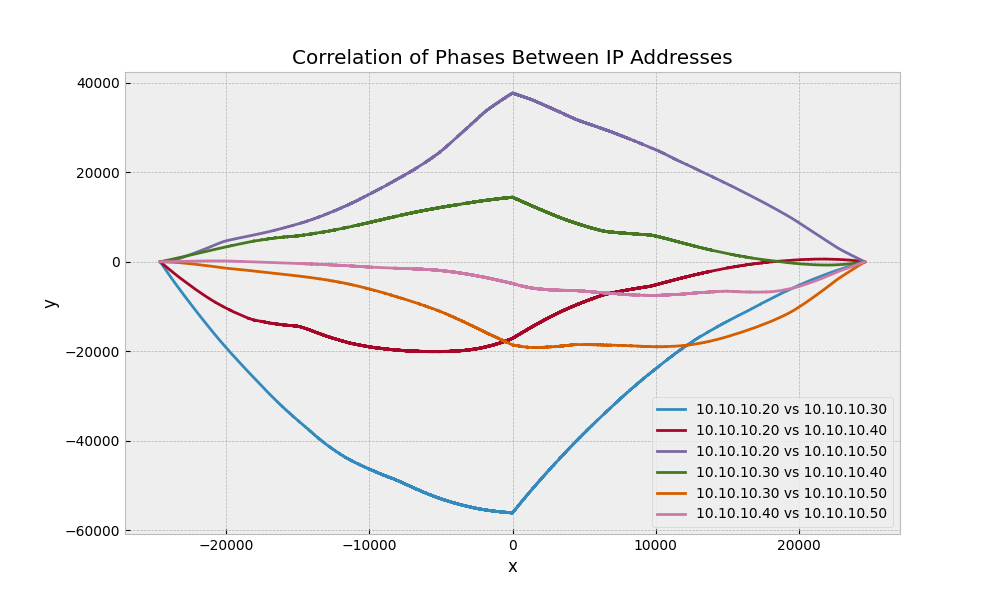

In [15]:
# not really sure what I did here

plt.figure(figsize=(10,6))
plt.title('Correlation of Phases Between IP Addresses')

# correlates each pair of signals
for i in range(len(data_comps)):
    for j in range(i+1, len(data_comps)):
        # grabs the signals to correlate
        signal1 = np.unwrap(np.angle(data_comps[i].ravel()[offset:offset+time_num] * phazor))
        signal2 = np.unwrap(np.angle(data_comps[j].ravel()[offset:offset+time_num] * phazor))
        
        # computes cross-correlation
        corr = correlate(signal1, signal2, mode='full')
        lags = np.arange(-len(signal1) + 1, len(signal1))
        
        # plots the cross-correlation
        plt.plot(lags, corr, label=f'{labels[i]} vs {labels[j]}')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()